<a href="https://colab.research.google.com/github/houman44/imperial-capstone-project/blob/main/Self_study_try_it_activity_11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-study try-it activity 11.1: Converting numerical to categorical predictors in Python

Converting numerical data to categorical data, also known as binning or discretisation, is a common technique in machine learning. It involves grouping continuous values into categories, which can help simplify the data and, in some cases, improve model performance or interpretability.

There are three main types of binning:

- Manual binning

- Equal-width binning

- Quantile binning (also called equal-frequency binning)

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Converting numerical values to categorical values

Generate a thousand random normal points, and plot the histogram.

In [2]:
np.random.seed(4)
points = np.random.normal(0, 1, size=1000)

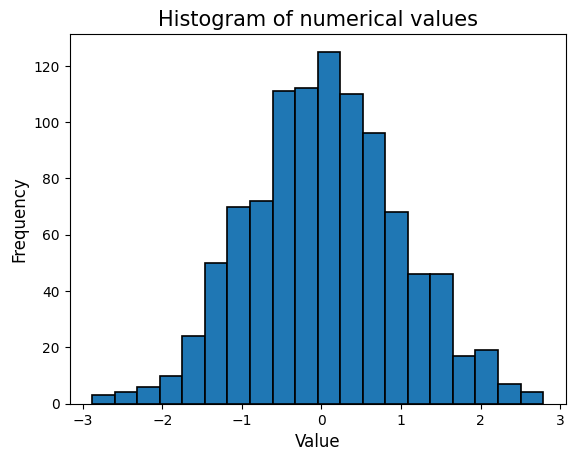

In [3]:
plt.hist(points, edgecolor='black', linewidth=1.2, bins = 20);
plt.xlabel("Value", fontsize=12);
plt.ylabel("Frequency", fontsize=12);
plt.title("Histogram of numerical values", fontsize=15);

Convert this variable into categories.

## Manual binning

Manual binning is a data preprocessing technique in which the intervals (bins) for grouping a numerical variable are defined manually based on domain knowledge or prior experience rather than automatically by an algorithm.

This approach allows the user to specify meaningful cut points or ranges that make sense for the specific context of the data, e.g. age groups such as 0–18, 19–35, 36–60 and 61+ years. Manual binning helps simplify the data and can improve interpretability by creating categories that are intuitive and relevant to the problem at hand.

In the first method, you define the category ranges manually.

For example, you may use the following intervals: $(-\infty, -1]$, $(-1, 0]$, $(0, 1]$, and $(1, \infty)$

In [4]:
#First, make your original data a data frame
data_dict = {"points": list(points)}
df = pd.DataFrame(data_dict, columns=['points'])

In [5]:
bins = [-np.inf, -1, 0, 1, np.inf]
names = ['manual_1', 'manual_2', 'manual_3', 'manual_4']
df['categorical_manual'] = pd.cut(df['points'], bins, labels=names)
df.head(6)

,points,categorical_manual
0,0.050562,manual_3
1,0.499951,manual_3
2,-0.995909,manual_2
3,0.693599,manual_3
4,-0.418302,manual_2
5,-1.584577,manual_1


In [6]:
#Now let's see what the histogram of the new categories looks like
counts = []
for i in range(len(names)):
    name = names[i]
    counts.append(np.sum(df.categorical_manual == name))

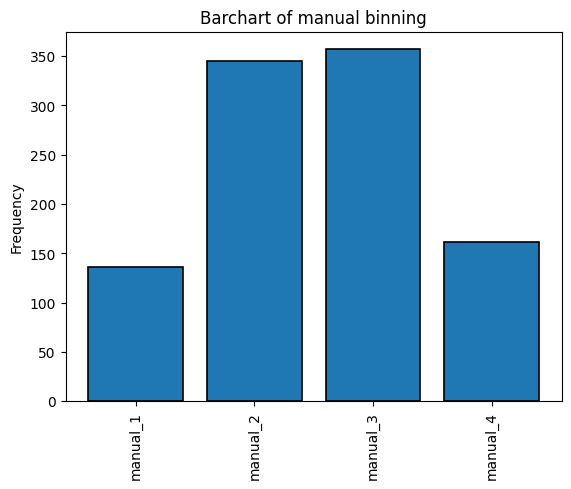

In [7]:
y_pos = range(len(names))
plt.bar(y_pos, counts, edgecolor='black', linewidth=1.2,)
#Rotation of the bars' names
plt.xticks(y_pos, names, rotation=90);
plt.ylabel("Frequency");
plt.title("Barchart of manual binning");

## Equal-width binning

In this second method, find the minimum and maximum values in `points`, then divide the range into four intervals of equal width.

Note: Equal width refers to the size of the intervals, not the number of data points in each group.

In [8]:
min_point = np.min(points)
max_point = np.max(points)
width = (max_point - min_point)/4

In [10]:
bins = [min_point-0.1, min_point + width, min_point + 2*width,min_point + 3*width, max_point + 0.1]
names = ['equal_1', 'equal_2', 'equal_3', 'equal_4']
df['categorical_equal_len'] = pd.cut(df['points'], bins, labels=names)

In [11]:
#Now let's see what the histogram of the new categories looks like
counts = []
for i in range(len(names)):
    name = names[i]
    counts.append(np.sum(df.categorical_equal_len == name))

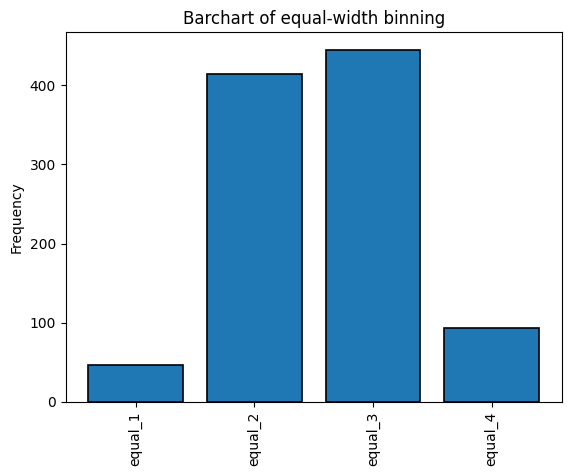

In [12]:
y_pos = range(len(names))
plt.bar(y_pos, counts, edgecolor='black', linewidth=1.2,)
#Rotation of the bars' names
plt.xticks(y_pos, names, rotation=90);
plt.ylabel("Frequency");
plt.title("Barchart of equal-width binning");

## Quantile binning (also called equal-frequency binning)

In this last method, split the data so that each bin contains the same number of instances.

In [13]:
names = ["freq_1","freq_2","freq_3","freq_4"]
df['categorical_equal_freq'] = pd.qcut(df['points'], 4, labels=names, duplicates='drop')

In [14]:
#Now let's see what the histogram of the new categories looks like
counts = []
for i in range(len(names)):
    name = names[i]
    counts.append(np.sum(df.categorical_equal_freq == name))

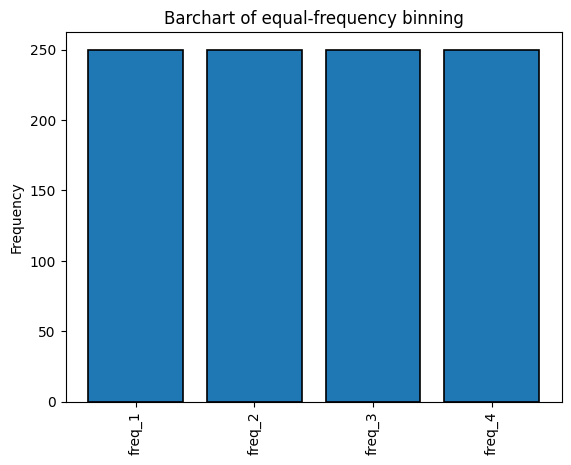

In [15]:
y_pos = range(len(names))
plt.bar(y_pos, counts, edgecolor='black', linewidth=1.2,)
#Rotation of the bars' names
plt.xticks(y_pos, names, rotation=90);
plt.ylabel("Frequency");
plt.title("Barchart of equal-frequency binning");

In [16]:
df.head(10)

,points,categorical_manual,categorical_equal_len,categorical_equal_freq
0,0.050562,manual_3,equal_3,freq_3
1,0.499951,manual_3,equal_3,freq_3
2,-0.995909,manual_2,equal_2,freq_1
3,0.693599,manual_3,equal_3,freq_4
4,-0.418302,manual_2,equal_2,freq_2
5,-1.584577,manual_1,equal_1,freq_1
6,-0.647707,manual_2,equal_2,freq_1
7,0.598575,manual_3,equal_3,freq_3
8,0.332250,manual_3,equal_3,freq_3
9,-1.147477,manual_1,equal_2,freq_1


Observe how the categorical numbers differ for instances 2, 3, 6 and 9.

## Prompts:

-  Use the `qcut` function to create four categories based on the quantiles 30%, 50%, 90% and 100%.

- Hint: Check the use of `q` on the [documentation of the `qcut` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html).

In [19]:
np.random.seed(4)
points = np.random.normal(0, 1, size=1000)
df = pd.DataFrame({'points': points})



Hint: for using the `qcut()` first define the quantiles and the labels. You may provide your own names for the labels.

Then, split the data into bins using the 30th, 50th, 90th and 100th percentiles. This creates the following bins:

- Minimum to 30th percentile

- 30th to 50th percentile

- 50th to 90th percentile

- 90th to 100th percentile

Ensure that your array of quantile edges should start with 0 (the minimum) and include the specified quantiles.

In [20]:
#Type in your answer here:
df['categorical_quantile'] = pd.qcut(df['points'],
                                      q=[0, 0.30, 0.50, 0.90, 1.0],
                                      labels=['Q1', 'Q2', 'Q3', 'Q4'])